ANN_2
【next】：理解ANN模型和keras.Sequential的含义；由此调参数；   效果不错之后延长预测时间； 考虑加上speed（现在只是power的时序）

用前120个数据点，预测之后的60个数据点（60min ——> 30min)
有一定的效果
需要理解ANN模型的搭建（keras.Sequential部分需要了解）
然后明白了模型是啥样的之后，调一下参数，应该会得到更好的结果。

https://keras-cn.readthedocs.io/en/latest/getting_started/functional_API/
keras中文文档


In [3]:
# -*- coding: utf-8 -*-
#coding:unicode_escape
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
plt.rcParams['axes.unicode_minus'] = False#解决负数问题

In [4]:
df = pd.read_csv("C:/Users/24496/Desktop/BigData/wind_raw.csv",encoding='unicode_escape')
df = df[['date','power','day']]
df

,date,power,day
0,2015/10/1 0:00,0.38065,1
1,2015/10/1 0:00,0.36943,1
2,2015/10/1 0:01,0.38529,1
3,2015/10/1 0:01,0.38892,1
4,2015/10/1 0:02,0.41220,1
...,...,...,...
89275,2015/10/31 23:57,0.10177,31
89276,2015/10/31 23:58,0.10354,31
89277,2015/10/31 23:58,0.10008,31
89278,2015/10/31 23:59,0.10516,31


In [5]:
df_only_power = df[['power']]
df_only_power


,power
0,0.38065
1,0.36943
2,0.38529
3,0.38892
4,0.41220
...,...
89275,0.10177
89276,0.10354
89277,0.10008
89278,0.10516


In [6]:
#使用前5天的数据做训练
df_train = df_only_power.iloc[:5*2880]
df_train
# df_train.isnull().values.any()   False

,power
0,0.38065
1,0.36943
2,0.38529
3,0.38892
4,0.41220
...,...
14395,0.65846
14396,0.63851
14397,0.68163
14398,0.68740


这里read_data和ANN_1不一样了。
改成，用之前N=30*2个数据预测后15min的数据

In [7]:
import pandas as pd
daaaa= pd.DataFrame([1,2,3,4,5,6,7,8,9,10])
def read_data(N,P):  #N是特征数目，就是用之前多少个power来预测；P是预测未来多少min之后的

    data = daaaa.values
    X = []
    Y = []
    for i in range(N,len(data)-P):  #
        # print("i:",i)
        s=[]
        for j in range(i-N,i):
            # print(j)
            s.append(data[j][0])
            # print(s)
        X.append(s)
        t=[]
        for k in range(i,i+P):   #Y是对未来的预测，预测的是好几个数值，现在是之后P/2分钟的结果。
            t.append(data[k][0])
        Y.append(t)
    print("X",X)
    print(Y)

    # return np.array(X),np.array(Y)
read_data(3,2)

X [[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7]]
[[4, 5], [5, 6], [6, 7], [7, 8], [8, 9]]


In [8]:
import pandas as pd

def read_data(N,P):  #N是特征数目，就是用之前多少个power来预测；P是预测未来多少min之后的

    data = df_train.values
    X = []
    Y = []
    for i in range(N,len(data)-P):  #
        # print("i:",i)
        s=[]
        for j in range(i-N,i):
            # print(j)
            s.append(data[j][0])
            # print(s)
        X.append(s)
        t=[]
        for k in range(i,i+P):   #Y是对未来的预测，预测的是好几个数值，现在是之后P/2分钟的结果。
            t.append(data[k][0])
        Y.append(t)
    # print("X",X)
    # print(Y)
    return np.array(X),np.array(Y)
N = 120
P = 60
x_train,y_train = read_data(N,P)

In [44]:
x_train

array([[0.24436, 0.25207, 0.25324, ..., 0.22228, 0.21797, 0.22823],
       [0.29006, 0.29292, 0.31468, ..., 0.42857, 0.42967, 0.43076],
       [0.01361, 0.01729, 0.01682, ..., 0.0446 , 0.0422 , 0.04227],
       ...,
       [0.84237, 0.81892, 0.83323, ..., 0.64457, 0.62209, 0.63985],
       [0.07159, 0.07562, 0.07674, ..., 0.12815, 0.12757, 0.1238 ],
       [0.16938, 0.16445, 0.16368, ..., 0.12608, 0.12516, 0.12198]])

In [9]:
# def read_data(N,P):  #N是特征数目，就是用之前多少个power来预测；P是预测未来多少min之后的

#     data = df_train.values
#     X = []
#     Y = []
#     for i in range(N,len(data)-P):  #
#         s=[]
#         for j in range(i-N,i):
#             s.append(data[j][0])
#         X.append(s)
#         Y.append(data[i][0])

#     return np.array(X),np.array(Y)

# Nset = 30*2 #用前20min的power预测后一个i

# N= Nset  
# X,Y = read_data(N)
# X


In [10]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size = 0.2)


In [11]:
y_test

array([[0.70492, 0.70548, 0.67875, ..., 0.80756, 0.7939 , 0.80449],
       [0.76582, 0.76247, 0.74988, ..., 0.74458, 0.74572, 0.74517],
       [0.72483, 0.72513, 0.69677, ..., 0.71372, 0.71413, 0.73427],
       ...,
       [0.14976, 0.15579, 0.16185, ..., 0.17436, 0.16847, 0.16395],
       [0.02962, 0.02791, 0.0305 , ..., 0.01821, 0.01569, 0.01956],
       [0.28805, 0.27563, 0.28653, ..., 0.20519, 0.19817, 0.21243]])

In [30]:
#模型结构，采用relu函数为激活函数，输入层为N个属性
#下面为4层隐含层，每层的神经元个数依次为500，500，250，250
#输入层对应N个属性
N=120
model = keras.Sequential([
        keras.layers.Dense(500,activation='relu',input_shape=[N]),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(250,activation='relu'),
        keras.layers.Dense(250,activation='relu'),
        keras.layers.Dense(250,activation='relu'),
        keras.layers.Dense(P)])#最后输出为P个数据，也就是预测的值
#定义损失函数loss，采用的优化器optimizer为Adam
model.compile(loss='mean_absolute_error',optimizer='Adam')
model.fit(x_train,y_train,batch_size = 250,epochs=1000)   #训练epochs个批次，每个批次数据量为batch_size

Epoch 1/1000
46/46 [==============================] - 1s 9ms/step - loss: 0.0753
Epoch 2/1000
46/46 [==============================] - 0s 9ms/step - loss: 0.0351
Epoch 3/1000
46/46 [==============================] - 0s 9ms/step - loss: 0.0358
Epoch 4/1000
46/46 [==============================] - 0s 10ms/step - loss: 0.0327
Epoch 5/1000
46/46 [==============================] - 0s 9ms/step - loss: 0.0343
Epoch 6/1000
46/46 [==============================] - 0s 10ms/step - loss: 0.0320
Epoch 7/1000
46/46 [==============================] - 0s 9ms/step - loss: 0.0317
Epoch 8/1000
46/46 [==============================] - 0s 10ms/step - loss: 0.0310
Epoch 9/1000
46/46 [==============================] - 0s 10ms/step - loss: 0.0315
Epoch 10/1000
46/46 [==============================] - 0s 10ms/step - loss: 0.0350
Epoch 11/1000
46/46 [==============================] - 0s 9ms/step - loss: 0.0309
Epoch 12/1000
46/46 [==============================] - 0s 9ms/step - loss: 0.0317
Epoch 13/1000
46/46 

In [31]:
loss= model.evaluate(x_train,y_train,verbose = 2)
rmse = loss**0.5
print("rmse ={}".format(rmse))

356/356 - 2s - loss: 0.0076 - 2s/epoch - 5ms/step
rmse =0.08734456342154599


In [32]:
#使用第20天的数据做预测验证
df_test = df.iloc[19*2880:20*2880]
df_test
# df_test.isnull().values.any()

,date,power,day
54720,2015/10/20 0:00,0.25200,20
54721,2015/10/20 0:00,0.26357,20
54722,2015/10/20 0:01,0.26896,20
54723,2015/10/20 0:01,0.26124,20
54724,2015/10/20 0:02,0.25907,20
...,...,...,...
57595,2015/10/20 23:57,0.39467,20
57596,2015/10/20 23:58,0.39337,20
57597,2015/10/20 23:58,0.39272,20
57598,2015/10/20 23:59,0.39813,20


In [33]:
df_test_only_power = df_test[['power']]
df_test_only_power

,power
54720,0.25200
54721,0.26357
54722,0.26896
54723,0.26124
54724,0.25907
...,...
57595,0.39467
57596,0.39337
57597,0.39272
57598,0.39813


In [34]:
# def read_data(N,P):  #N是特征数目，就是用之前多少个power来预测；P是预测未来多少min之后的

#     data = df_train.values
#     X = []
#     Y = []
#     for i in range(N,len(data)-P):  #
#         # print("i:",i)
#         s=[]
#         for j in range(i-N,i):
#             # print(j)
#             s.append(data[j][0])
#             # print(s)
#         X.append(s)
#         t=[]
#         for k in range(i,i+P):   #Y是对未来的预测，预测的是好几个数值，现在是之后P/2分钟的结果。
#             t.append(data[k][0])
#         Y.append(t)
#     # print("X",X)
#     # print(Y)
#     return np.array(X),np.array(Y)
# N = 120
# x_train,y_train = read_data(120,60)

In [35]:
def read_data_test(N,P):  #N是特征数目，就是用之前多少个power 来预测后一个i   现在这还是预测后一个i！！！

    data = df_test_only_power.values
    X = []
    Y = []
    for i in range(N,len(data)-P):  #
        # print("i:",i)
        s=[]
        for j in range(i-N,i):
            # print(j)
            s.append(data[j][0])
            # print(s)
        X.append(s)
        t=[]
        for k in range(i,i+P):   #Y是对未来的预测，预测的是好几个数值，现在是之后P/2分钟的结果。
            t.append(data[k][0])
        Y.append(t)

    return np.array(X),np.array(Y)
N=120
P=60
x_test, y_test_true = read_data_test(N,P)
len(y_test_true)



2700

In [36]:
#输出结果预测
y_test_predict=model.predict(x_test)
# print('预测结果为：',y_test_predict)

85/85 [==============================] - 0s 3ms/step


In [37]:
y_test_true

array([[0.2187 , 0.22106, 0.21551, ..., 0.17506, 0.1736 , 0.1753 ],
       [0.22106, 0.21551, 0.21413, ..., 0.1736 , 0.1753 , 0.1842 ],
       [0.21551, 0.21413, 0.2172 , ..., 0.1753 , 0.1842 , 0.17795],
       ...,
       [0.3804 , 0.37717, 0.36646, ..., 0.40251, 0.39467, 0.39337],
       [0.37717, 0.36646, 0.38492, ..., 0.39467, 0.39337, 0.39272],
       [0.36646, 0.38492, 0.3825 , ..., 0.39337, 0.39272, 0.39813]])

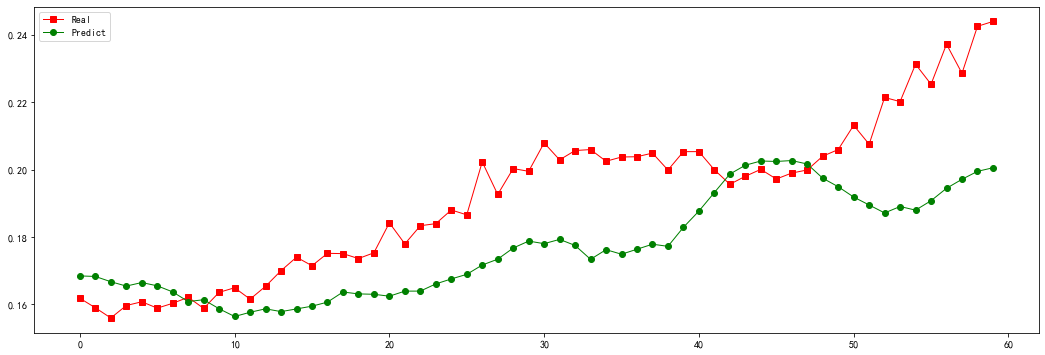

In [38]:

t = np.arange(len(y_test_predict[4]))
plt.figure(figsize=(18,6))
plt.plot(t, y_test_true[40],"rs-", linewidth=1, label='Real')
plt.plot(t, y_test_predict[40], 'go-', linewidth=1, label='Predict')
plt.legend()
plt.show()


In [39]:
len(y_test_predict)

2700

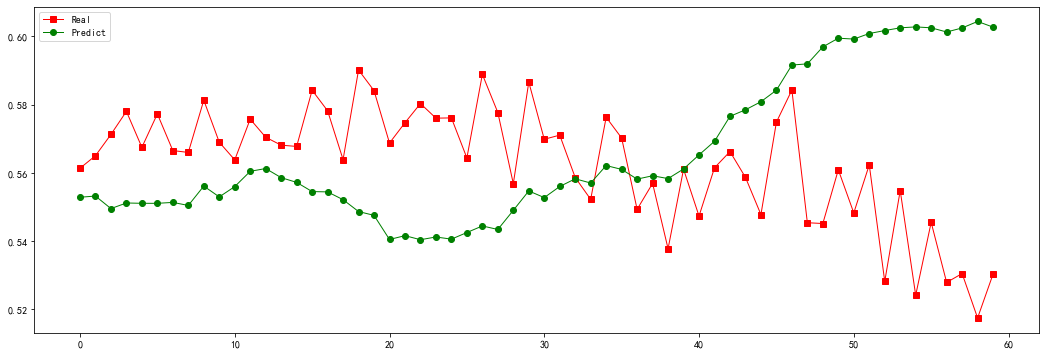

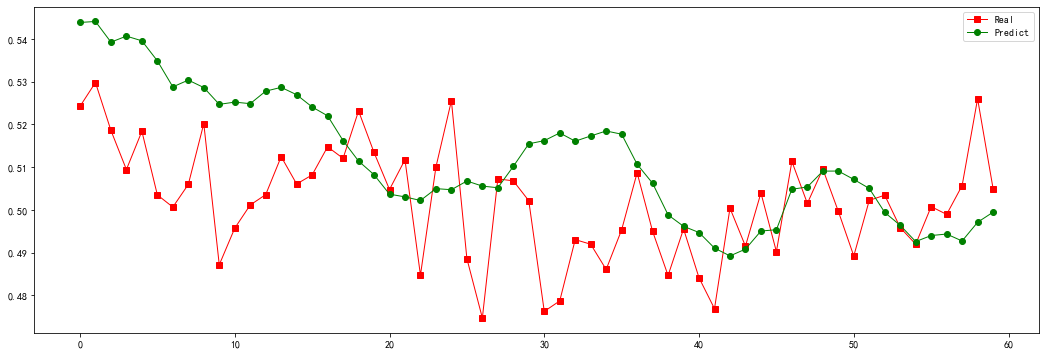

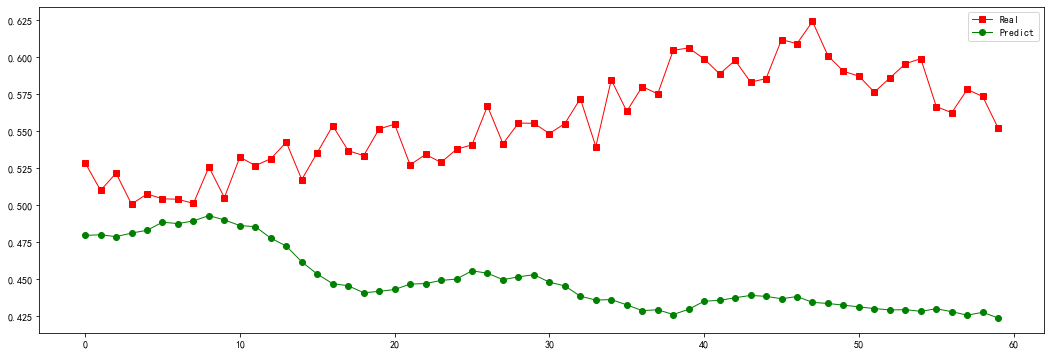

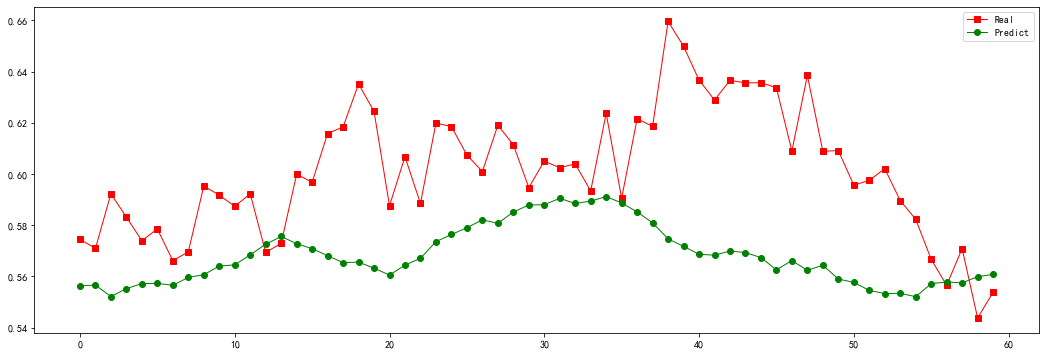

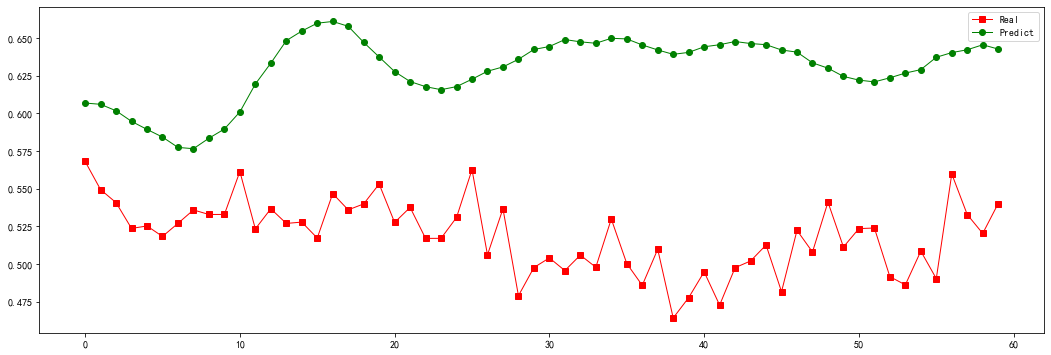

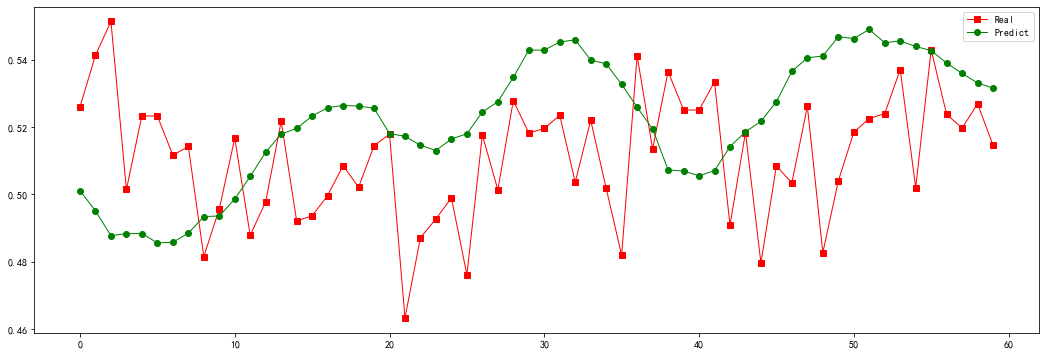

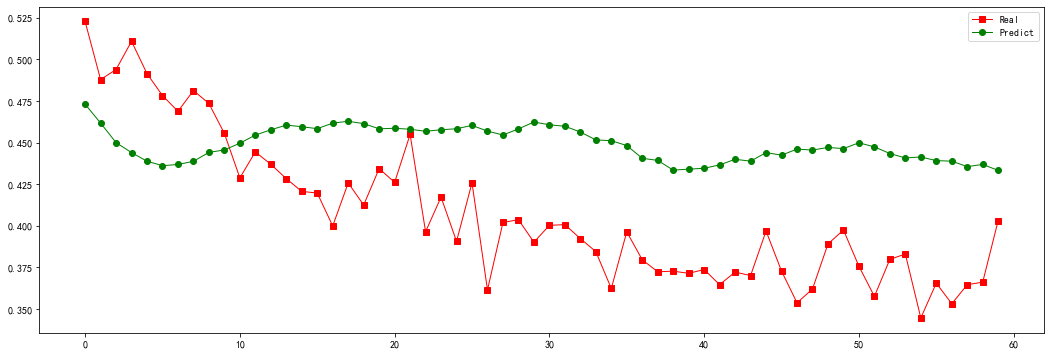

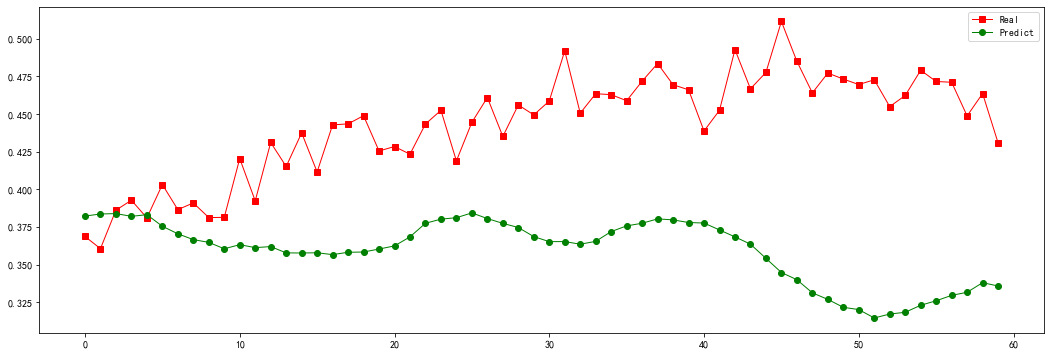

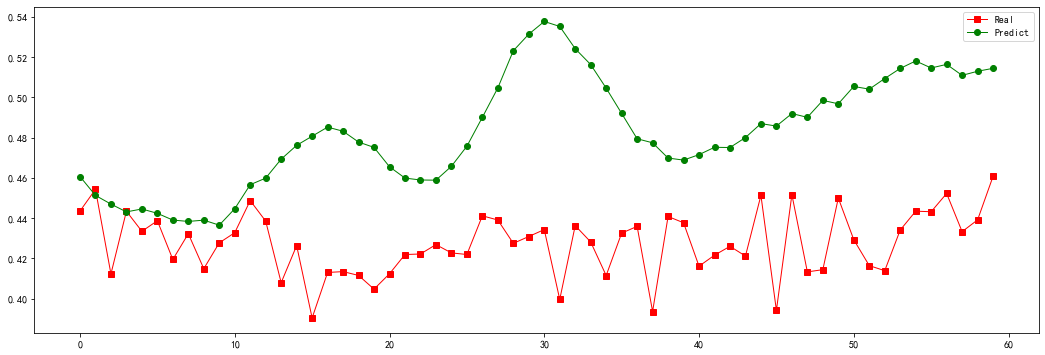

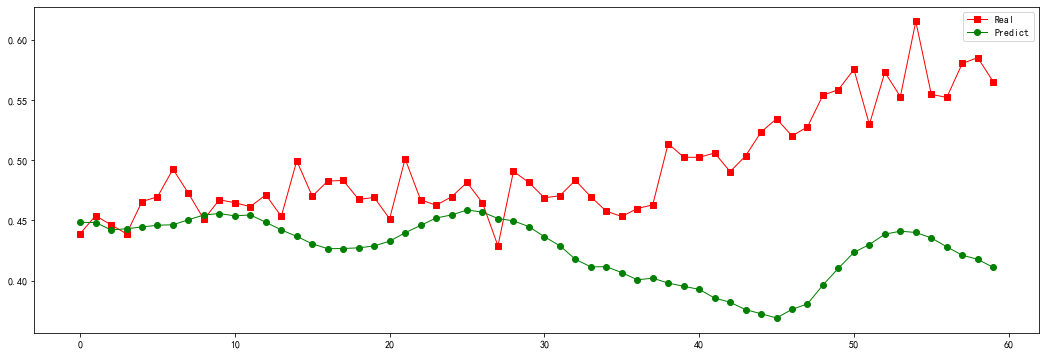

In [40]:
for i in range(10,20):
    t = np.arange(len(y_test_predict[i*60]))
    plt.figure(figsize=(18,6))
    plt.plot(t, y_test_true[i*60],"rs-", linewidth=1, label='Real')
    plt.plot(t, y_test_predict[i*60], 'go-', linewidth=1, label='Predict')
    plt.legend()
    plt.show()